### Notebook to identify different CCDs and exposure metrics



In [1]:
import set_dataloader
import time
import pickle
from matplotlib import pyplot as plt
import healpy as hp
import numpy as np


In [2]:
# Load Dict mapping Subpixel 2 CCDs (very large file, will take upwards of 10 mins usually)

time_start = time.time()
# Importing Pixel Mappings
# For DECAM, BASS, MzLS
with open('../../bricks_data/pixel2ccd_2048_non_inclusive.pickle', 'rb') as f:
    subpixel2ccd_dict = pickle.load(f)
    f.close()
time_end = time.time()
time_passed = time_end - time_start
print()
print(f"{time_passed / 60:.5} minutes ({time_passed:.3} seconds) taken to import the dict")
print()



16.313 minutes (9.79e+02 seconds) taken to import the dict



In [7]:
print(subpixel2ccd_dict[889358])
pix = 889358
ccd_ids = [6423979, 6595510, 6671160, 6690372, 6693442, 6693607, 6698164, 6698410, 6763892, 6776075]

[6423979, 6595510, 6671160, 6690372, 6693442, 6693607, 6698164, 6698410, 6763892, 6776075]


In [3]:
# defining a ccd object (initialised upon calling it)

import  importlib
importlib.reload(set_dataloader)

ccd = set_dataloader.CCD()

In [4]:
# prepare for ccd retrieval --> 2 options

# If metrics are supposed to be scaled and filter band encoded
#ccd.initialise_for_deepset()

# if metrics are supposed to be unsccaled and filter colour not encoded
ccd.stack_systematics()

In [5]:
# Process to return a given pixels ccds:

# 1. define pixel to extract

pixel = 889358

# 2. get associated CCDs

tangent_ccds = subpixel2ccd_dict[pixel]

# 3. Get CCDs values from the catalogue for chosen features:

ccds_values = ccd.get_ccds(tangent_ccds)

print(ccds_values)

# Values are in order:
# airmass, seeing, ccdskysb, ccdskycounts, filter colour

[6423979, 6595510, 6671160, 6690372, 6693442, 6693607, 6698164, 6698410, 6763892, 6776075]
[['1.369333' '1.31262' '19.36533' '51.43641' 'z']
 ['1.7863028' '1.8313799' '19.215212' '59.063282' 'z']
 ['1.37' '0.92486' '23.59339' '4.473703' 'g']
 ['1.43' '0.6943' '23.026192' '8.119816' 'r']
 ['1.65' '0.76242' '22.887026' '9.230223' 'r']
 ['1.64' '0.83578' '22.88196' '9.2733965' 'r']
 ['1.39' '0.65762' '23.372616' '5.4824686' 'g']
 ['1.38' '0.76766' '23.160248' '6.666897' 'g']
 ['1.38' '1.2654599' '21.61585' '29.7634' 'r']
 ['1.48' '1.1921' '23.565025' '4.5921135' 'g']]


Number of CCDs that are cutting pixel number 889358: 10


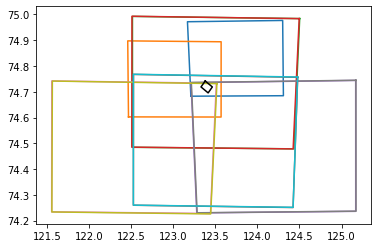

In [6]:
# Example of a given application --> Plot a Pixel

# pixel_number = 28536897 --> largest populated pixel
pixel_number = 889358
NSIDE = 2048

tangent_ccds = subpixel2ccd_dict[pixel_number]


print(f"Number of CCDs that are cutting pixel number {pixel_number}: {len(tangent_ccds)}")
for image in tangent_ccds:
    xs, ys = ccd.get_ccd_boundaries(image)
    plt.plot(xs, ys)

pixel_boundary = hp.boundaries(nside=NSIDE, pix=pixel_number, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(), lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0], pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1], pixel_boundary_raDec[1][0])

plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='black', label="Pixel Boundary")

plt.show()